In [4]:
# 通过 bif 文件生成因果数据集 .npy
import numpy as np
import pandas as pd
from pgmpy.readwrite import BIFReader
from pgmpy.sampling import BayesianModelSampling
from pgmpy.models import BayesianNetwork

/home/wukaiwen/envs/miniconda3/envs/cdllm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model_path = "../../models/asia.bif"
n_samples = 1000

In [6]:
# 加载网络模型
reader = BIFReader(model_path)
model = reader.get_model()

# 采样数据
inference = BayesianModelSampling(model)
data = inference.forward_sample(size=n_samples)

# 保存为 .npy 文件
# 可能需要把类别变量转换为数值型
data_numeric = data.apply(lambda x: pd.factorize(x)[0])
np.save(f"../asia_data_n{n_samples}.npy", data_numeric.values)

Generating for node: dysp: 100%|██████████| 8/8 [00:00<00:00, 961.42it/s]


In [5]:
# 可选：保存为 CSV 文件以便查看
data_numeric.to_csv(f"../asia_data_n{n_samples}.csv", index=False)

In [ ]:
# 生成答案图的邻接矩阵 .npy 文件
# 注意变量顺序需与数据集一致
columns = list(data.columns)
var_to_idx = {var: i for i, var in enumerate(columns)}
n_vars = len(columns)
adj_matrix = np.zeros((n_vars, n_vars))

for u,v in model.edges():
    if u in var_to_idx and v in var_to_idx:
        u_idx = var_to_idx[u]
        v_idx = var_to_idx[v]
        adj_matrix[u_idx, v_idx] = 1

# save adjacency matrix
np.save(f"../asia_graph.npy", adj_matrix)


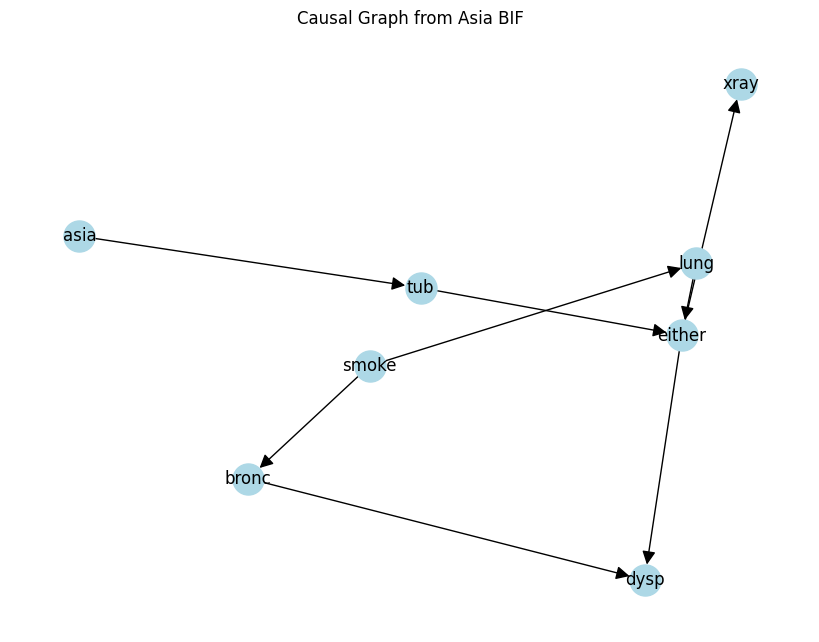

In [9]:
# 可选：用matplotlib 和 networkx 可视化邻接矩阵
import matplotlib.pyplot as plt
import networkx as nx
G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
labels = {i: var for var, i in var_to_idx.items()}
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, labels=labels, with_labels=True, node_color='lightblue', node_size=500, arrowsize=20)
plt.title("Causal Graph from Asia BIF")
plt.show()